<a href="https://colab.research.google.com/github/Furkan-Coskun/Exercises/blob/master/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import fetch_openml

In [2]:
mnist = fetch_openml("mnist_784", as_frame = False)

/usr/local/lib/python3.9/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
X, y = mnist.data, mnist.target

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
import matplotlib.pyplot as plt

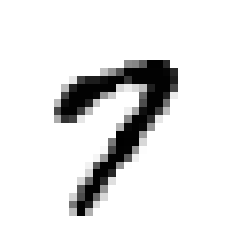

In [7]:
def plot_digit(image_data):
  image = image_data.reshape(28,28)
  plt.imshow(image, cmap = "binary")
  plt.axis("off")
some_digit = X[15]
plot_digit(some_digit)
plt.show()

In [8]:
y[15]

'7'

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
X[:70000]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [11]:
y.dtype

dtype('O')

In [12]:
y_train[15]

'7'

In [13]:
y_train_15 = (y_train == "7")
y_test_15 = (y_test == "7")

In [14]:
y_test_15


array([ True, False, False, ..., False, False, False])

In [15]:
y_train_15

array([False, False, False, ..., False, False, False])

In [16]:
from sklearn.linear_model import SGDClassifier

In [17]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_15)

SGDClassifier(random_state=42)

In [18]:
sgd_clf.predict([some_digit])

array([ True])

In [19]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(sgd_clf, X_train, y_train_15, cv = 5, scoring ="accuracy")

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
dummy_clf = DummyClassifier()
dummy_clf.fit(X_train, y_train_15)

In [ ]:
print(any(dummy_clf.predict(X_train)))

In [ ]:
cross_val_score(dummy_clf, X_train, y_train_15, cv = 5, scoring ="accuracy")

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [ ]:
skfolds= StratifiedKFold(n_splits=3)

In [ ]:
for train_index,test_index in skfolds.split(X_train, y_train_15):
  clone_clf = clone(sgd_clf)
  X_train_folds = X_train[train_index]
  y_train_folds = y_train_15[train_index]
  X_test_folds = X_train[test_index]
  y_test_folds = y_train_15[test_index]

  clone_clf.fit(X_train_folds, y_train_folds)
  y_pred = clone_clf.predict(X_test_folds)
  n_correct = sum(y_pred == y_test_folds)
  print(n_correct / len(y_pred))

In [ ]:
from sklearn.model_selection import cross_val_predict
y_train_pred  = cross_val_predict(sgd_clf, X_train, y_train_15, cv = 5)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_15, y_train_pred)
cm

In [ ]:
from sklearn.metrics import precision_score, recall_score

In [ ]:
precision_score(y_train_15, y_train_pred)

In [ ]:
recall_score(y_train_15, y_train_pred)

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_train_15, y_train_pred)

0.8925874807177073